# Latent Diritchet Allocation

---

## Topic Modeling - Unsupervised Learning

Leer documentos no etiquetados y obtener un listado de posibles tópicos de manera no supervisada

In [1]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models import TfidfModel, LdaMulticore
import nltk
import numpy as np
import spacy
from document import Document
import pandas as pd
import util.log as log
log.init_logger()
from util.graphics.word_cloud import show_word_cloud
from util.graphics.bar import show_bar_graphic
from repository.csv_tools import get_documents, get_data

In [ ]:
dataframe = pd.read_csv('../data.csv')

In [3]:
documents = get_documents('../data.csv')
preprocessed_docs = [document.lemmatized_string for document in documents]

In [4]:
id2token = gensim.corpora.Dictionary(preprocessed_docs)

In [5]:
id2token.filter_extremes(no_below=5, no_above=0.5)
bag_of_words = [id2token.doc2bow(doc) for doc in preprocessed_docs]
bag_of_words_tf_dif = TfidfModel(bag_of_words)[bag_of_words]

In [6]:
lda_model = LdaMulticore(bag_of_words, num_topics=10, id2word=id2token, passes=100, workers=6, iterations = 100, random_state=0)

In [7]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {}\nWords: {}\n'.format(idx, topic))

Topic: 0
Words: 0.068*"cliente" + 0.025*"marca" + 0.024*"social" + 0.015*"comunidad" + 0.012*"conectividad" + 0.011*"horizontal" + 0.010*"mundo" + 0.010*"precio" + 0.010*"red" + 0.009*"posicionamiento"

Topic: 1
Words: 0.016*"tarea" + 0.013*"conocimiento" + 0.013*"coste" + 0.012*"concepto" + 0.012*"favorecer" + 0.011*"plataforma" + 0.011*"compartir" + 0.011*"global" + 0.010*"ley" + 0.010*"capacidad"

Topic: 2
Words: 0.038*"largo" + 0.035*"cola" + 0.028*"nicho" + 0.022*"demanda" + 0.017*"ofrecer" + 0.013*"consumidor" + 0.013*"venta" + 0.012*"cantidad" + 0.012*"ahora" + 0.012*"coste"

Topic: 3
Words: 0.041*"venta" + 0.032*"commerce" + 0.020*"com" + 0.020*"comercio" + 0.017*"unidos" + 0.016*"minorista" + 0.016*"www" + 0.016*"fuente" + 0.015*"porcentaje" + 0.015*"crecer"

Topic: 4
Words: 0.068*"experiencia" + 0.067*"cliente" + 0.020*"masivo" + 0.017*"valor" + 0.011*"sacrificio" + 0.010*"oferta" + 0.010*"necesidad" + 0.009*"campo" + 0.009*"ciberespacio" + 0.009*"individuo"

Topic: 5
Words: 

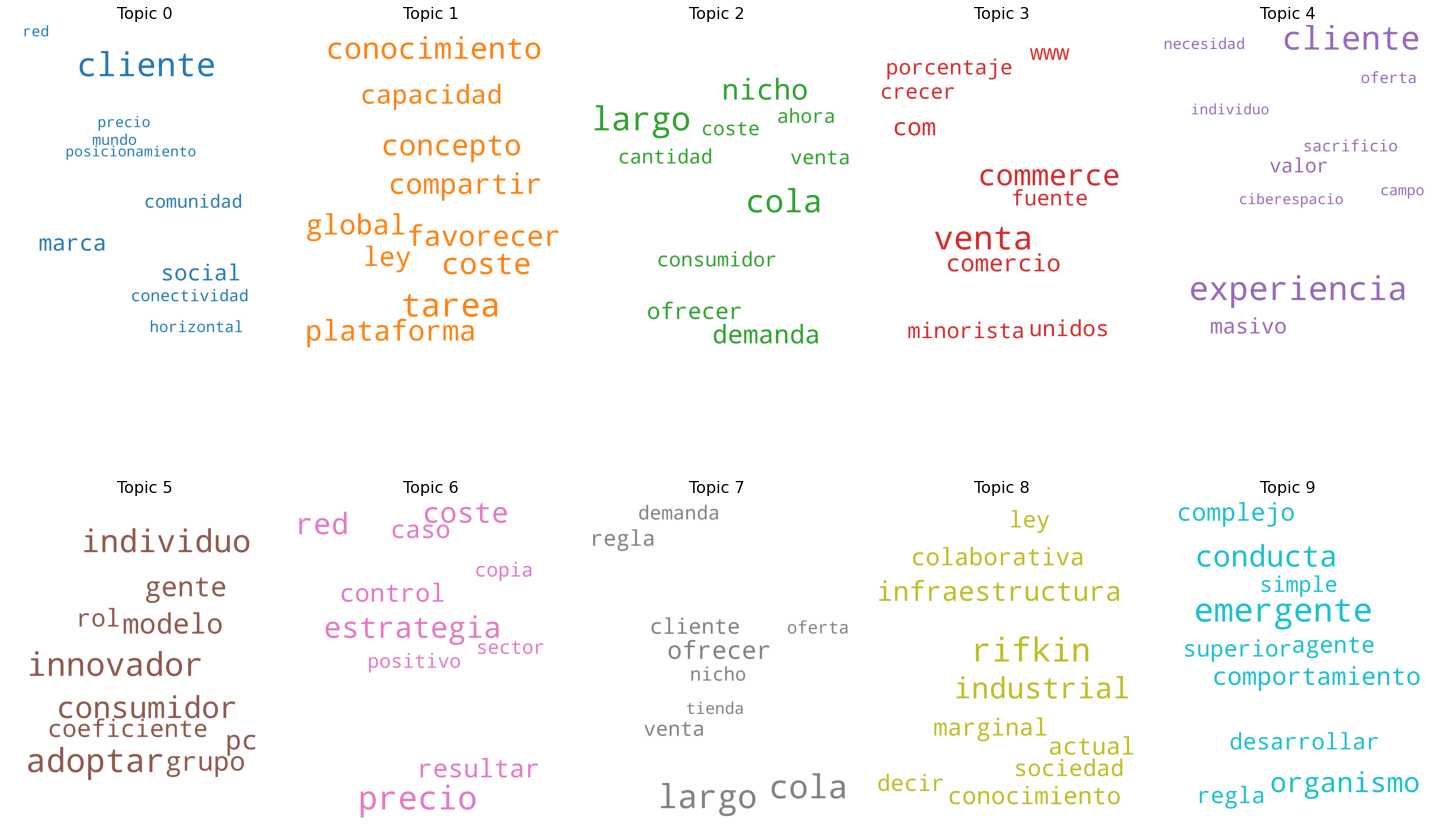

In [8]:
show_word_cloud(lda_model, rows = 2, columns = 5)

In [17]:
def get_topic(model, bow):
    possible_topics = model[bow]
    max = 0
    pmax = 0

    for topic, probability in possible_topics:
        if probability > pmax:
            max = topic
            pmax = probability

    return max 


def get_dictionary(model, bag_of_words):
    topic_counts = {}
    for i in range(len(model.print_topics())):
        topic_counts['{}'.format(i)] = 0

    for bag in bag_of_words:
        topic_counts['{}'.format(get_topic(model, bag))] += 1

    return topic_counts

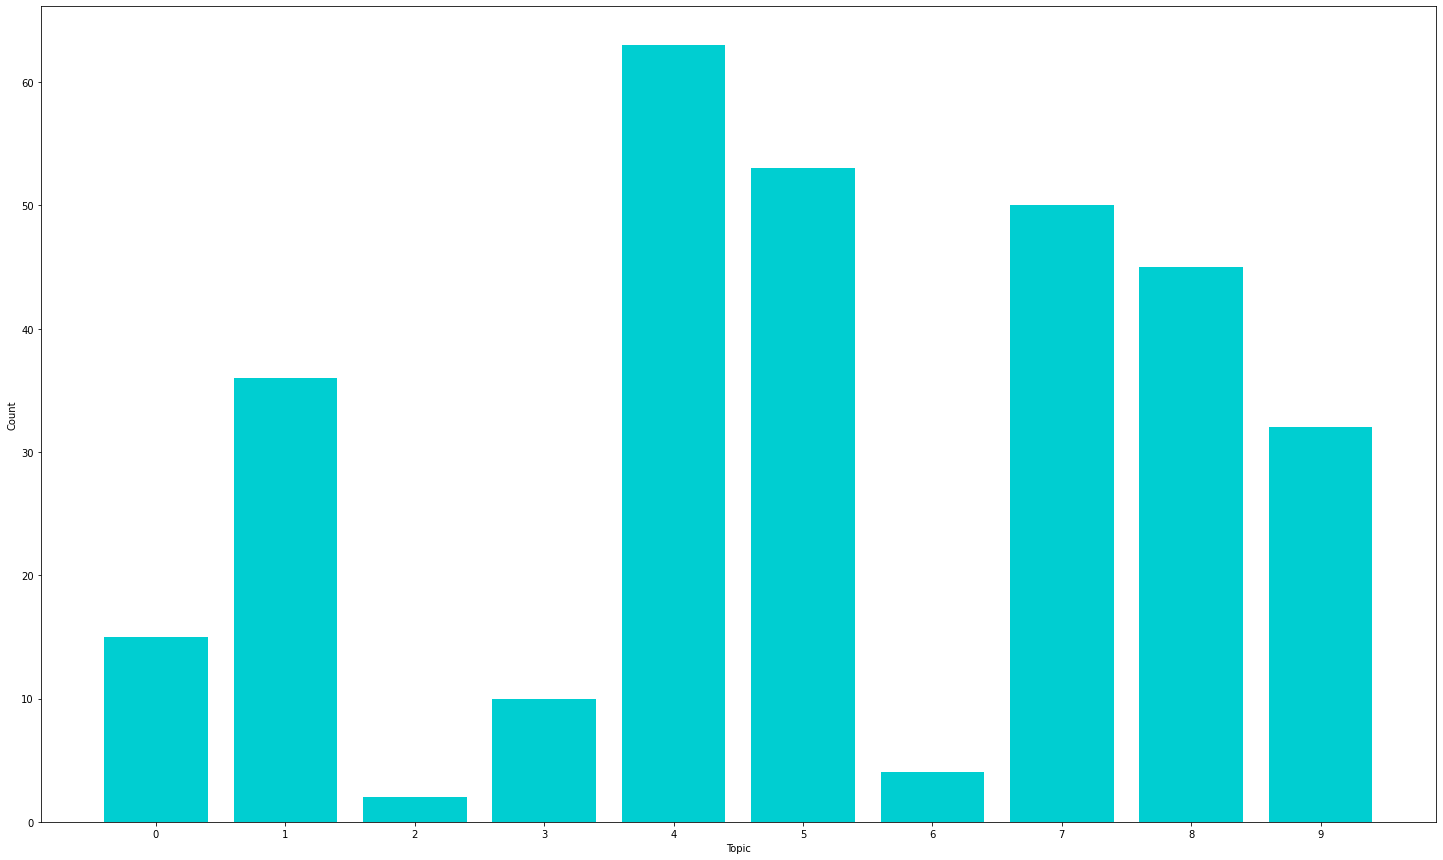

In [10]:
show_bar_graphic(get_dictionary(lda_model, bag_of_words), 'Topic', 'Count')

In [11]:
lda_model2 = LdaMulticore(bag_of_words, num_topics=2, id2word=id2token, passes=100, workers=6, iterations = 100, random_state=0)

In [16]:
for idx, topic in lda_model2.print_topics(-1):
    print('Topic: {}\nWords: {}\n'.format(idx, topic))

Topic: 0
Words: 0.014*"cliente" + 0.008*"red" + 0.008*"coste" + 0.007*"rifkin" + 0.007*"concepto" + 0.007*"conocimiento" + 0.006*"social" + 0.006*"ley" + 0.006*"industrial" + 0.006*"plataforma"

Topic: 1
Words: 0.026*"cliente" + 0.021*"experiencia" + 0.018*"largo" + 0.016*"cola" + 0.010*"consumidor" + 0.009*"individuo" + 0.009*"ofrecer" + 0.008*"modelo" + 0.008*"adoptar" + 0.007*"innovador"



In [18]:
show_bar_graphic(get_dictionary(lda_model2, bag_of_words), 'Topic', 'Count')

KeyError: '7'

In [ ]:
import ujson
import json
json.loads("[\'hola', \'como\', \'estas\']")

In [ ]:
a_list = list(range(5000))
data = str(a_list)
data[:5]

In [ ]:
data = '["caca",2,3, 5, 7,8,9]'

import json
json.loads("hola")

In [ ]:
data